In [34]:
import pandas as pd   #Pandas to deal with data set
import matplotlib.pyplot as plt  #Visulaisations
import datetime
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import xgboost as xgb  #Used the  XGBoost model to sales forcasting
import numpy as np # Used this for calculations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
train=pd.read_csv("/content/drive/MyDrive/Medium Article Colob/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Medium Article Colob/test.csv")

In [3]:
test.columns

Index(['id', 'date', 'store', 'item'], dtype='object')

In [4]:
train.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [5]:
print(train.shape,test.shape)

(913000, 4) (45000, 4)


In [6]:
print('store'	, ' values: ', train['store'].unique()) # unique()- Getting unique details columns
print('item'	, ' values: ', train['item'].unique())
print('store'	, ' values: ', test['store'].unique())
print('item'	, ' values: ', test['item'].unique())

store  values:  [ 1  2  3  4  5  6  7  8  9 10]
item  values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
store  values:  [ 1  2  3  4  5  6  7  8  9 10]
item  values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


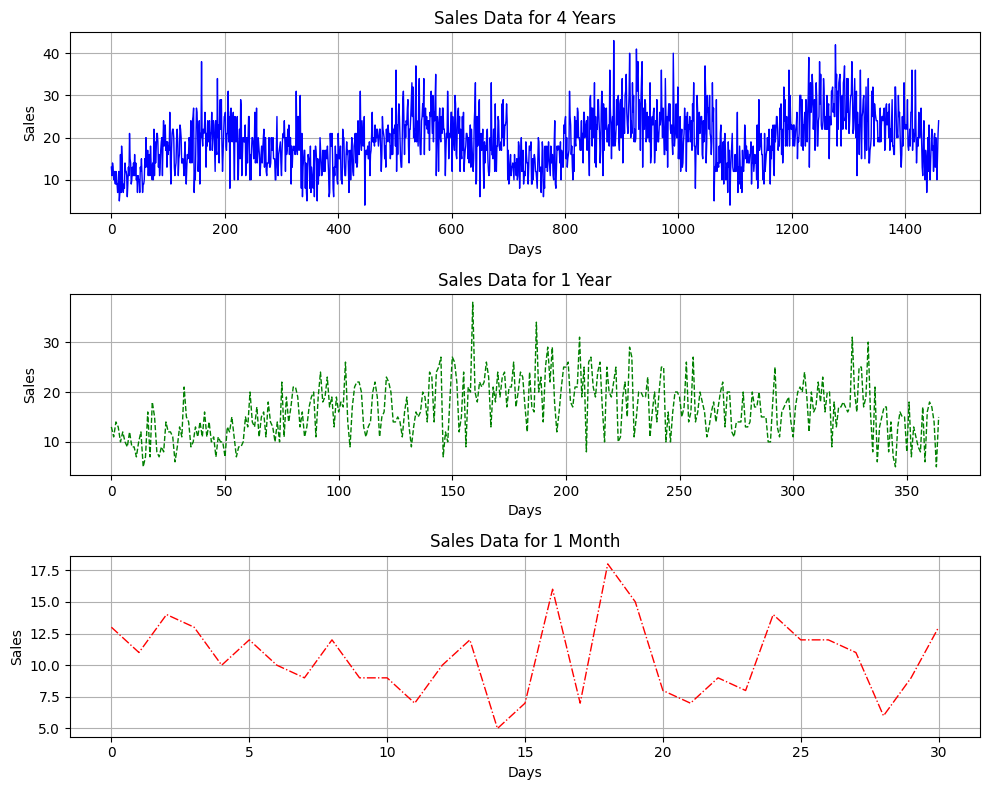

In [7]:
# Check the data the seasonality of the data.

plt.figure(figsize=(10, 8))  # Figure size easy to read

# First Subplot: Sales data for 4 years
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(train.sales[:365*4], color='blue', linestyle='-', linewidth=1)
plt.title("Sales Data for 4 Years")
plt.ylabel("Sales")  # Label Y-axis
plt.xlabel("Days")
plt.grid(True)

# Second Subplot: Sales data for 1 year
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(train.sales[:365], color='green', linestyle='--', linewidth=1)
plt.title("Sales Data for 1 Year")
plt.ylabel("Sales")
plt.xlabel("Days")
plt.grid(True)

# Third Subplot: Sales data for 1 month
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(train.sales[:31], color='red', linestyle='-.', linewidth=1)
plt.title("Sales Data for 1 Month")
plt.ylabel("Sales")
plt.xlabel("Days")
plt.grid(True)


plt.tight_layout()


plt.show()

In [8]:
#Rolling mean help to remove the noise data
# Calculate the 7-day rolling mean
rolling_mean = train['sales'].rolling(window=7).mean()

# Print the shape of the rolling mean
print("Shape of rolling mean:", rolling_mean.shape)

# Display the first 31 days of the rolling mean
print("First 31 rolling mean values:")
print(rolling_mean[:31])

Shape of rolling mean: (913000,)
First 31 rolling mean values:
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6     11.857143
7     11.285714
8     11.428571
9     10.714286
10    10.142857
11     9.714286
12     9.428571
13     9.714286
14     9.142857
15     8.428571
16     9.428571
17     9.142857
18    10.714286
19    11.428571
20    10.857143
21    11.142857
22    11.428571
23    10.285714
24    11.285714
25    10.428571
26    10.000000
27    10.428571
28    10.285714
29    10.285714
30    11.000000
Name: sales, dtype: float64


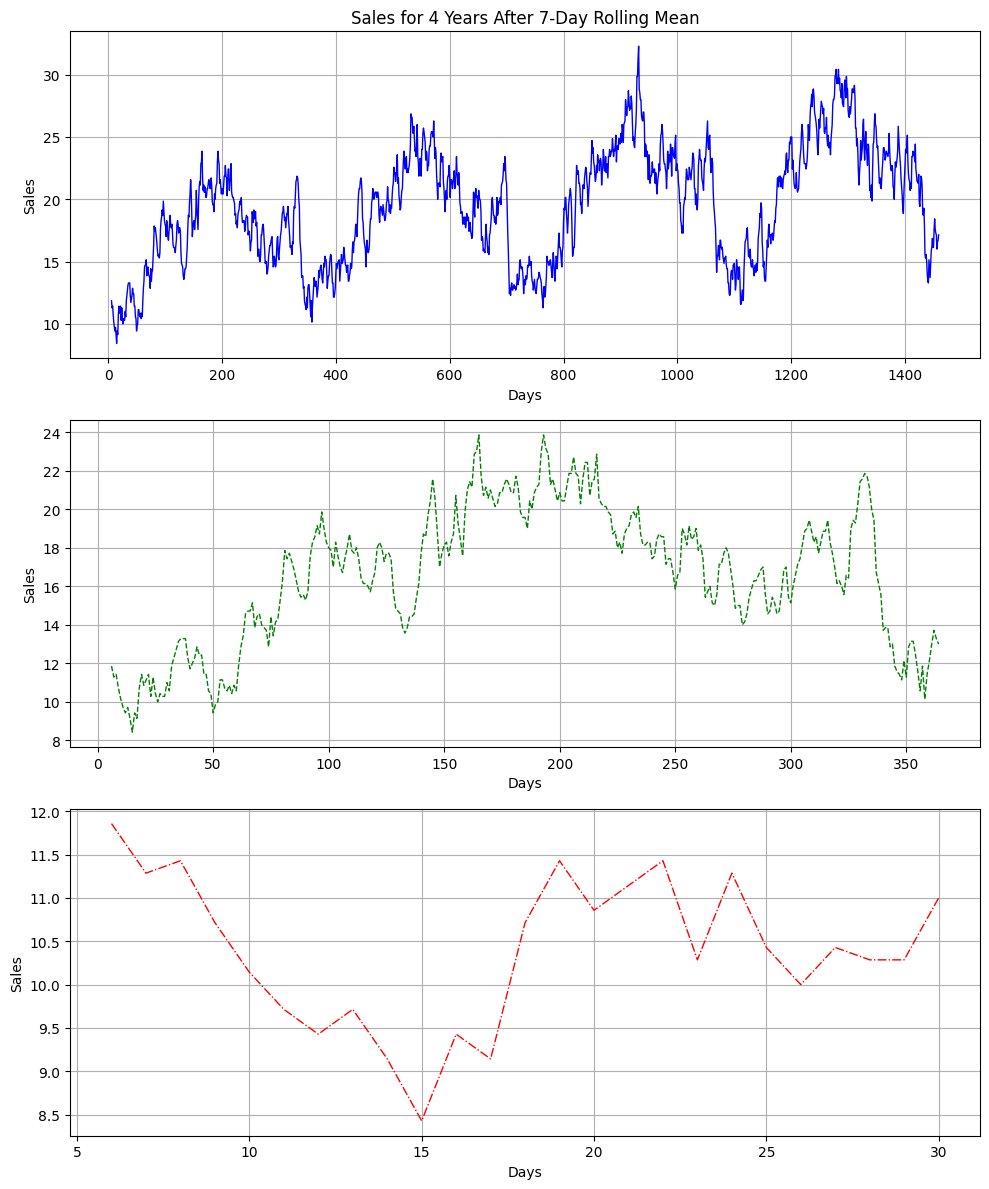

In [9]:
# Calculate 7-day rolling mean
rolling_mean = train.sales.rolling(window=7).mean()

# Create a figure
plt.figure(figsize=(10, 12))

# Subplot 1: Sales data for 4 years with rolling mean
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st plot
plt.plot(rolling_mean[:365*4], color='blue', linestyle='-', linewidth=1)
plt.title("Sales for 4 Years After 7-Day Rolling Mean")
plt.ylabel("Sales")
plt.xlabel("Days")
plt.grid(True)

# Subplot 2: Sales data for 1 year with rolling mean
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd plot
plt.plot(rolling_mean[:365], color='green', linestyle='--', linewidth=1)
plt.ylabel("Sales")
plt.xlabel("Days")
plt.grid(True)

# Subplot 3: Sales data for 1 Month with rolling mean
plt.subplot(3, 1, 3)
plt.plot(rolling_mean[:31],color='red', linestyle='-.', linewidth=1)
plt.ylabel("Sales")
plt.xlabel("Days")
plt.grid(True)


plt.tight_layout()

plt.show()

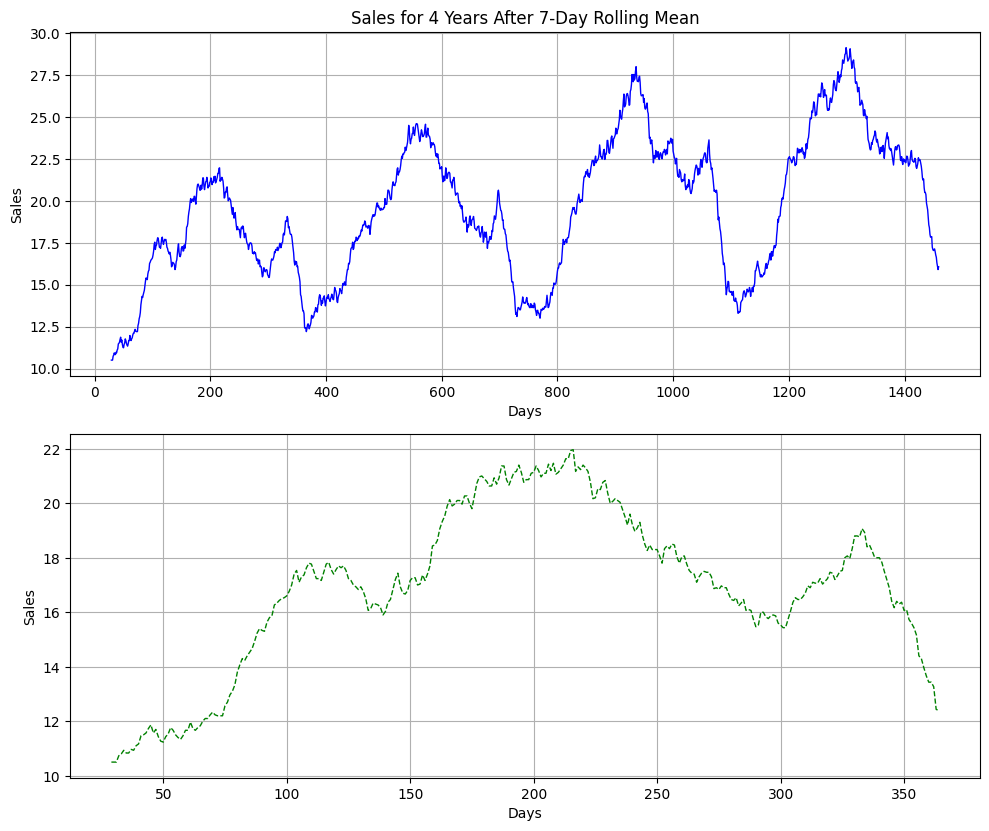

In [10]:
# Calculate 31-day rolling mean
rolling_mean = train.sales.rolling(window=30).mean()

# Create a figure
plt.figure(figsize=(10, 12))

# Subplot 1: Sales data for 4 years with rolling mean
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st plot
plt.plot(rolling_mean[:365*4], color='blue', linestyle='-', linewidth=1)
plt.title("Sales for 4 Years After 7-Day Rolling Mean")
plt.ylabel("Sales")
plt.xlabel("Days")
plt.grid(True)

# Subplot 2: Sales data for 1 year with rolling mean
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd plot
plt.plot(rolling_mean[:365], color='green', linestyle='--', linewidth=1)
plt.ylabel("Sales")
plt.xlabel("Days")
plt.grid(True)


plt.tight_layout()

plt.show()

In [11]:
# Combine the train and test data


data_combine = pd.concat([train,test])

print("size of data_combine",data_combine.shape)

size of data_combine (958000, 5)


In [ ]:
data_combine.head()

In [12]:
# Convert 'date' column to datetime
data_combine['date'] = pd.to_datetime(data_combine['date'])

# Extract features from the 'date' column
data_combine['month'] = data_combine['date'].dt.month
data_combine['weekday'] = data_combine['date'].dt.dayofweek
data_combine['year'] = data_combine['date'].dt.year

# Use .dt.isocalendar() to get the week of the year
data_combine['week_of_year'] = data_combine['date'].dt.isocalendar().week

# Check the result
print(data_combine[['date', 'month', 'weekday', 'year', 'week_of_year']].head())

        date  month  weekday  year  week_of_year
0 2013-01-01      1        1  2013             1
1 2013-01-02      1        2  2013             1
2 2013-01-03      1        3  2013             1
3 2013-01-04      1        4  2013             1
4 2013-01-05      1        5  2013             1


In [13]:
data_combine['date_order'] = (data_combine['date'] - datetime.datetime(2013, 1, 1)).dt.days

In [14]:
data_combine.head(5)

,date,store,item,sales,id,month,weekday,year,week_of_year,date_order
0,2013-01-01,1,1,13.0,NaN,1,1,2013,1,0
1,2013-01-02,1,1,11.0,NaN,1,2,2013,1,1
2,2013-01-03,1,1,14.0,NaN,1,3,2013,1,2
3,2013-01-04,1,1,13.0,NaN,1,4,2013,1,3
4,2013-01-05,1,1,10.0,NaN,1,5,2013,1,4


In [15]:
data_combine['sale_moving_average_7days']=data_combine.groupby(["item","store"])['sales'].transform(lambda x: x.rolling(window=7,min_periods=1).mean())
data_combine['sale_moving_average_7days_shifted-90']=data_combine.groupby(["item","store"])['sale_moving_average_7days'].transform(lambda x:x.shift(90))
#Grouping items and sales . After that I have done the rolloing method. Created the 2 new columns

In [ ]:
data_combine.head(5)

In [16]:
data_combine['store_item_shifted-90'] = data_combine.groupby(["item","store"])['sales'].transform(lambda x:x.shift(90)) #Creating new column and shifted 90 days

In [ ]:
data_combine

In [18]:
data_combine['store_item_shifted-10'] = data_combine.groupby(["item","store"])['sales'].transform(lambda x:x.shift(10))

In [19]:
col = [i for i in data_combine.columns if i not in ['date','id','sale_moving_average_7days']] #In col I'm removing date,id,Sale,sale_moving_average_7days
col

['store',
 'item',
 'sales',
 'month',
 'weekday',
 'year',
 'week_of_year',
 'date_order',
 'sale_moving_average_7days_shifted-90',
 'store_item_shifted-90',
 'store_item_shifted-10']

In [20]:
y_target = train.sales
y_target.head()

,sales
0,13
1,11
2,14
3,13
4,10


In [21]:
train_new = data_combine.loc[~data_combine.sales.isna()]
print("new train",train_new.shape)
test_new = data_combine.loc[data_combine.sales.isna()]
print("new test",test_new.shape)

#Here in train_new I'm getting all values in sales
#Here in test_new I'm getting all NAN values in sales

new train (913000, 14)
new test (45000, 14)


In [23]:
train_new = (train_new[col]).dropna()  #Remove all the NAN values here


In [24]:
train_new.shape

(868000, 11)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    train_new[col],  # Features (independent variables)
    train_new.sales, # Target (dependent variable)
    test_size=0.15,  # Size of the test set
    random_state=42  # Random seed for reproducibility
)

In [35]:


# Define the SMAPE function
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = np.abs(y_true) + np.abs(y_pred)
    numerator = np.abs(y_true - y_pred)
    smape_values = np.where(denominator == 0, 0.0, numerator / denominator)
    return 200 * np.mean(smape_values)

# Checking number of rows in train_new[col] and y_target sum are the same
if train_new[col].shape[0] != y_target.shape[0]:
    print(f"Adjusting y_target to match feature rows: {train_new[col].shape[0]} rows.")
    y_target = y_target[:train_new[col].shape[0]]

# Convert data to DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(train_new[col], label=y_target)
test_dmatrix = xgb.DMatrix(X_test[col], label=y_test)

# Parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task with squared error loss
    'eval_metric': 'rmse',            # Evaluation metric: Root Mean Squared Error
    'eta': 0.05,                      # Learning rate
    'max_depth': 6,                   # Maximum depth of a tree
    'n_estimators': 50,              # Number of boosting rounds
    'learning_rate': 0.01,            # Step size shrinkage (same as eta)
    'subsample': 0.8,                 # Fraction of samples used for training each tree
    'colsample_bytree': 0.8,          # Fraction of features used for training each tree
    'alpha': 0.1,                     # L1 regularization term
    'lambda': 0.1                     # L2 regularization term
}

# Custom SMAPE evaluation function
def smape_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    return 'smape', smape(y_true, y_pred)

# List to store trained models
model_sets = []

# Train the XGBoost model
print("Training XGBoost model...")
model = xgb.train(
    params=params,
    dtrain=train_dmatrix,
    num_boost_round=100,
    evals=[(train_dmatrix, 'train'), (test_dmatrix, 'test')],
    feval=smape_eval,
    early_stopping_rounds=30,
    verbose_eval=10
)

# Store the trained model
model_sets.append(model)

# Predictions
y_train_pred_xgb = model.predict(train_dmatrix)
y_test_pred_xgb = model.predict(test_dmatrix)

# Evaluation Metrics
train_smape = smape(y_target, y_train_pred_xgb)
test_smape = smape(y_test, y_test_pred_xgb)

train_mae = mean_absolute_error(y_target, y_train_pred_xgb)
test_mae = mean_absolute_error(y_test, y_test_pred_xgb)

train_mse = mean_squared_error(y_target, y_train_pred_xgb)
test_mse = mean_squared_error(y_test, y_test_pred_xgb)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_target, y_train_pred_xgb)
test_r2 = r2_score(y_test, y_test_pred_xgb)

print(f"SMAPE error - Train: {train_smape:.4f}, Test: {test_smape:.4f}")
print(f"MAE - Train: {train_mae:.4f}, Test: {test_mae:.4f}")
print(f"MSE - Train: {train_mse:.4f}, Test: {test_mse:.4f}")
print(f"RMSE - Train: {train_rmse:.4f}, Test: {test_rmse:.4f}")
print(f"R² - Train: {train_r2:.4f}, Test: {test_r2:.4f}")

# Log-transformed Mean Absolute Error
train_log_mae = mean_absolute_error(np.log1p(y_target), np.log1p(y_train_pred_xgb))
test_log_mae = mean_absolute_error(np.log1p(y_test), np.log1p(y_test_pred_xgb))

print(f"Log-Transformed MAE - Train: {train_log_mae:.4f}, Test: {test_log_mae:.4f}")


Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:16:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:28.92494	train-smape:46.35314	test-rmse:28.89933	test-smape:45.59988
[10]	train-rmse:28.25662	train-smape:45.37782	test-rmse:28.65691	test-smape:45.23355
[20]	train-rmse:27.67756	train-smape:44.49702	test-rmse:28.50021	test-smape:44.95309
[30]	train-rmse:27.17763	train-smape:43.70558	test-rmse:28.41302	test-smape:44.74758
[40]	train-rmse:26.73378	train-smape:42.97583	test-rmse:28.38321	test-smape:44.60479
[50]	train-rmse:26.32839	train-smape:42.28272	test-rmse:28.38165	test-smape:44.47765
[60]	train-rmse:26.05138	train-smape:41.78818	test-rmse:28.39099	test-smape:44.39804
[70]	train-rmse:25.73227	train-smape:41.19929	test-rmse:28.43130	test-smape:44.31816
[80]	train-rmse:25.43455	train-smape:40.63802	test-rmse:28.50817	test-smape:44.28472
[90]	train-rmse:25.21014	train-smape:40.22352	test-rmse:28.55311	test-smape:44.23602
[99]	train-rmse:24.98940	train-smape:39.79657	test-rmse:28.56348	test-smape:44.12510
SMAPE error - Train: 39.7966, Test: 44.1251
MAE - Train: 19.6151, 

Predictions saved to 'xgboost_predictions.csv'.


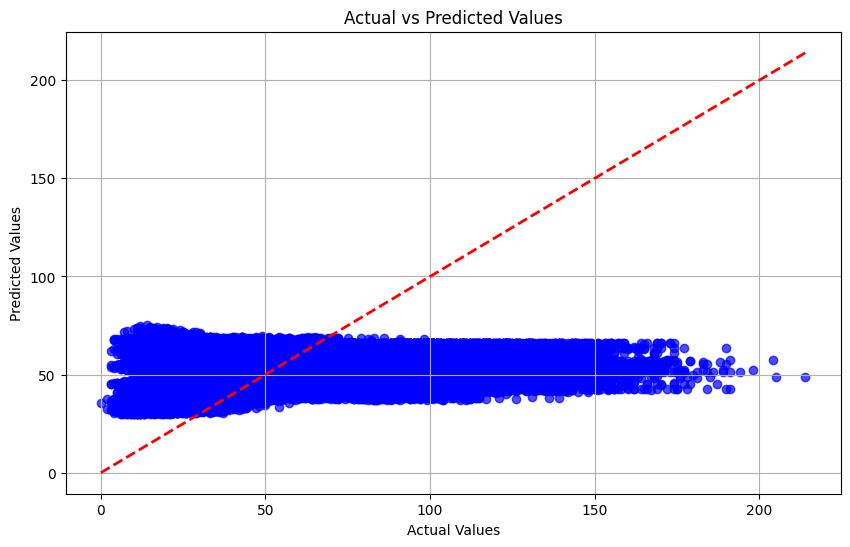

Actual vs Predicted plot saved as 'actual_vs_predicted.png'.


In [38]:
# Save predictions to CSV
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_xgb
})
predictions_df.to_csv("sales_Prediction.csv", index=False)
print("Predictions saved to 'xgboost_predictions.csv'.")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_xgb, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid()
plt.savefig("actual_vs_predicted.png")
plt.show()
print("Actual vs Predicted plot saved as 'actual_vs_predicted.png'.")


<Figure size 1000x600 with 0 Axes>

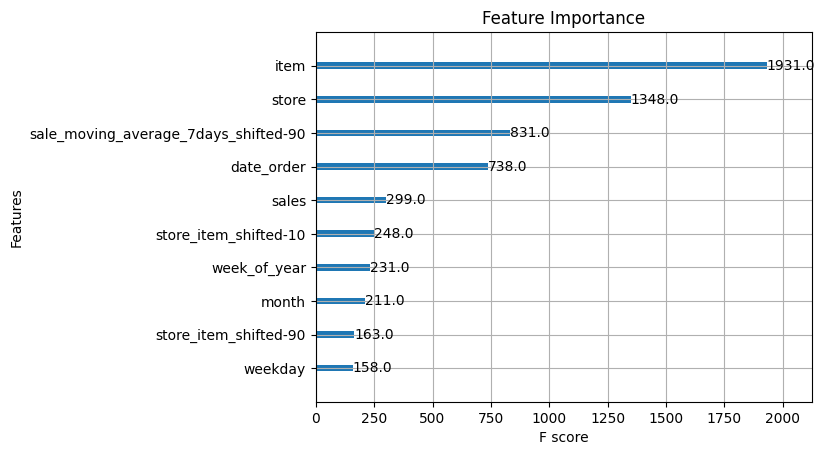

In [39]:
# 3. Feature Importance Visualization
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()